[1. Начало работы с временными рядами ](https://medium.com/data-science-in-your-pocket/starting-off-with-time-series-56056c4f4b78)

[2. Анализ временных рядов](https://medium.com/swlh/time-series-analysis-7006ea1c3326)

<div style='color:white; background:black; font-weight: bold; padding:15px,15px,15px,15px; font-size: 30px; text-align: center'>Теория</div>

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Временные ряды</div>

![](img/time_seria.png)

**Примеры:**
+ суммарная выручка торговой точки
+ максимальная температура дня
+ ключевая ставка ЦБ

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Основные понятия</div>

![](img/time_seria2.png)

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Прогнозирование временных рядов</div>

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>AR - авторегрессия</div>

![](img/auroregression.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>MA - скольязящее среднее</div>

![](img/rolling_mean.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>ARMA - авторегрессия скольязящего среднего</div>

![](img/ARMA.png)

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Метрики качества классификации</div>

![](img/metric_clf.png)

<div style='color:white; background:black; font-weight: bold; padding:15px,15px,15px,15px; font-size: 30px; text-align: center'>Практика</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install missingno
#для тех, у кого нет этой библиотеки

In [3]:
import missingno as miss

#### EDA

In [11]:
features = pd.read_csv('Lesson_2_features.csv')
sales = pd.read_csv('Lesson_2_sales.csv')
stores = pd.read_csv('Lesson_2_stores.csv')

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


<AxesSubplot:>

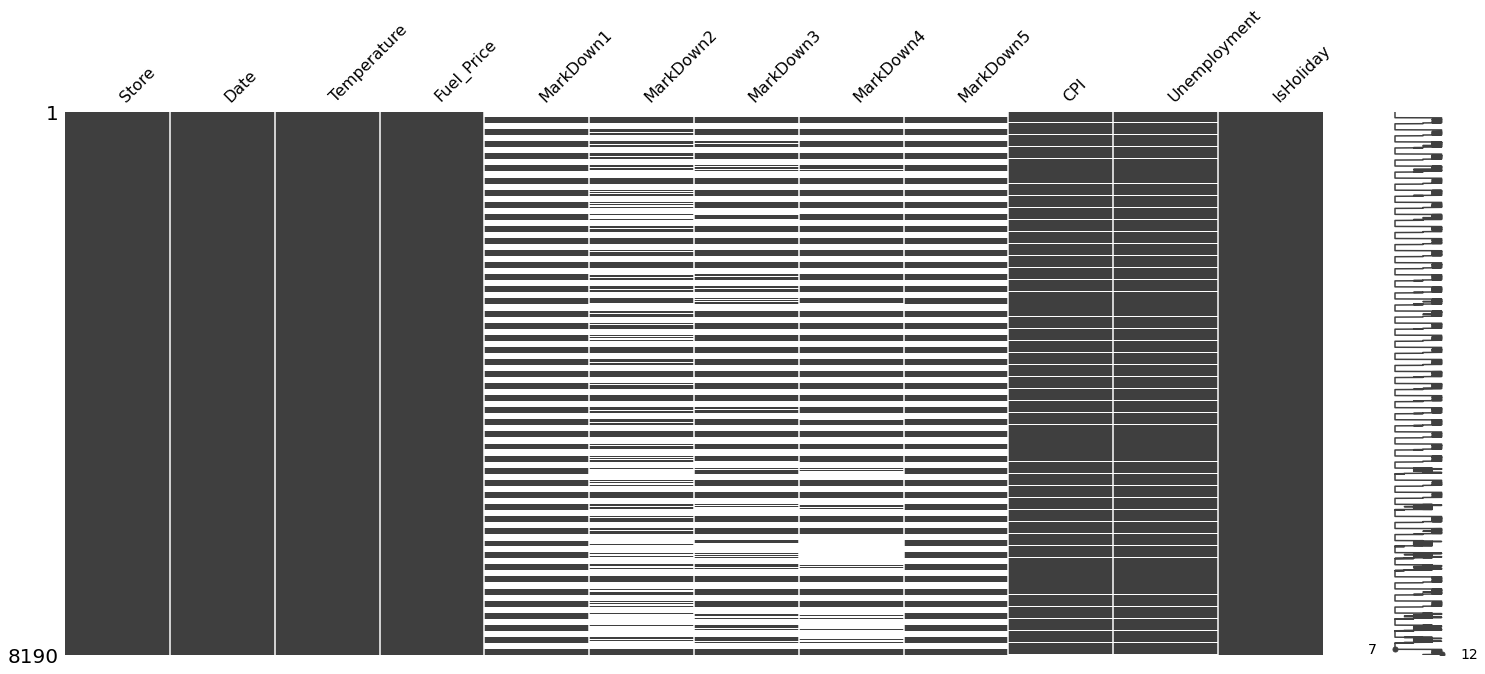

In [14]:
miss.matrix(features)

In [15]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [16]:
features["CPI"] = features["CPI"].fillna(features["CPI"].median())
features["Unemployment"] = features["Unemployment"].fillna(features["Unemployment"].median())
features['Temperature'] = (features['Temperature']- 32) * 5./9.

In [17]:
sales.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [18]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

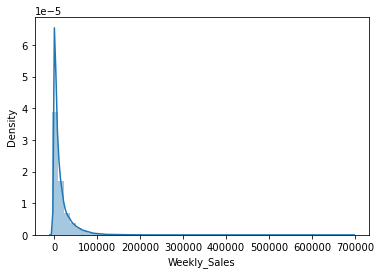

In [19]:
sns.distplot(sales['Weekly_Sales'])

In [20]:
sales[sales["Weekly_Sales"]>=200000].head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
7741,1,72,25/11/2011,203670.47,True
11148,2,7,24/12/2010,264837.42,False
11200,2,7,23/12/2011,214118.51,False
17896,2,72,26/11/2010,285353.53,True
17900,2,72,24/12/2010,223396.79,False


In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Факторизация - преобразования True\False в 1\0

In [22]:
holidays_factor, types = sales['IsHoliday'].factorize()
sales['IsHoliday'] = holidays_factor

In [23]:
types

Index([False, True], dtype='object')

In [24]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [25]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [26]:
df = pd.merge(sales, features, on = ['Store','Date', 'IsHoliday'], how = 'left')
df = pd.merge(df, stores, on = ['Store'], how = 'left')
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  object        
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [28]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,1,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,0,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,0,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [29]:
new_df = df[["Store", "Dept", "Date", "Weekly_Sales", "IsHoliday", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Type", "Size"]]

Text(0, 0.5, 'Продажи')

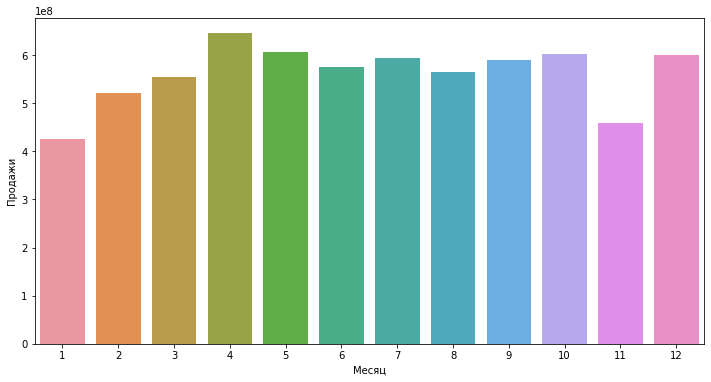

In [30]:
sales_month = new_df.groupby(df['Date'].dt.month).agg({"Weekly_Sales":"sum"})

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_month.index, y=sales_month.Weekly_Sales)
plt.xlabel("Месяц")
plt.ylabel("Продажи")

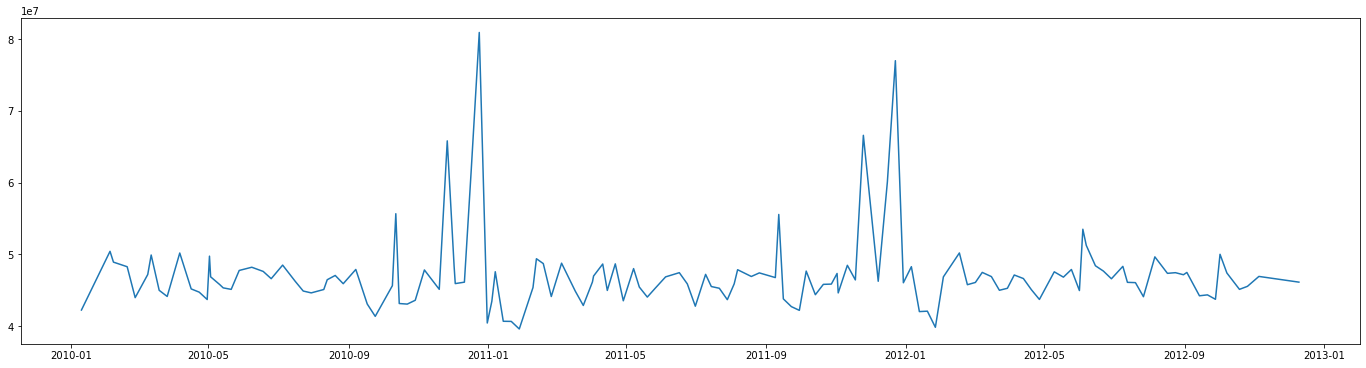

In [31]:
df_weekly = new_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_weekly['Date']=pd.to_datetime(df_weekly['Date'])
df_weekly.set_index('Date', inplace=True)


plt.figure(figsize=(24, 6))
plt.plot(df_weekly.index, df_weekly['Weekly_Sales'])

In [113]:
# автокорреляция
ac_array = acf(df_weekly['Weekly_Sales'], fft=False, nlags = 104)
ac_array

array([ 1.00000000e+00,  1.85228763e-01, -6.64554730e-05,  6.02855273e-02,
        2.30328289e-02, -2.54934789e-04, -1.65936173e-01, -5.56861472e-02,
       -4.88474825e-02, -9.48262241e-02, -6.39569180e-02,  3.05126309e-02,
       -4.18576901e-02, -1.11160513e-01, -2.47007476e-02,  5.48208984e-02,
        1.60143234e-02, -2.87365684e-02, -3.27652911e-02, -4.12971898e-02,
       -6.76566266e-02, -2.68484364e-02, -1.56807776e-02,  3.06550202e-02,
       -1.80730494e-02,  6.16442528e-02,  6.12828707e-02, -1.39535237e-02,
       -2.19813795e-02, -3.29131217e-02, -9.92102493e-02, -7.63872677e-02,
       -2.56992257e-02,  1.92723316e-02,  2.47368646e-03, -2.09379323e-02,
       -2.07713905e-02,  5.62172171e-02, -2.27172242e-02, -6.77427926e-02,
        2.25642764e-02, -3.99576507e-02, -4.81727387e-03, -2.40338758e-02,
       -1.22966489e-02, -9.77495198e-02, -1.27929359e-01, -9.21951436e-02,
       -3.25162876e-02,  1.45750869e-01,  3.19284817e-02,  7.36453261e-02,
        3.31035246e-01,  

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Попытка получить значения лагов в `order`

In [135]:
ac_95 = np.quantile(np.abs(ac_array), 0.95)
ac_95

0.12457558948212877

In [133]:
np.where(np.abs(ac_array) < ac_95, 0, 1)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [139]:
acdf = pd.DataFrame(np.where(np.abs(ac_array) < ac_95, 0, 1), columns=['has'])
acdf[acdf['has']==1].index

Int64Index([0, 1, 6, 46, 49, 52], dtype='int64')

Более менее похоже

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [103]:
df_weekly['Weekly_Sales']

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

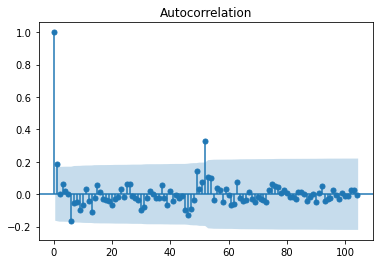

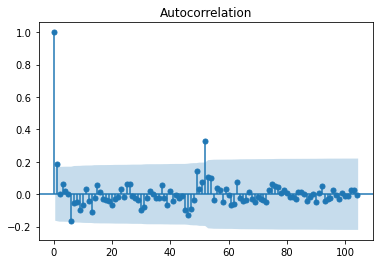

In [112]:
plot_acf(df_weekly['Weekly_Sales'], lags = 104)

In [147]:
from statsmodels.graphics.tsaplots import plot_pacf

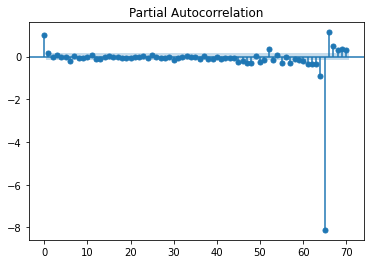

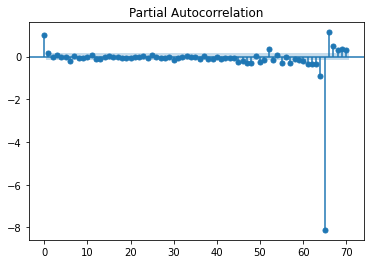

In [149]:
plot_pacf(df_weekly['Weekly_Sales'], lags = 70)

In [34]:
df_weekly

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-10-08,47403451.04
2012-10-19,45122410.57
2012-10-26,45544116.29


In [35]:
# наибольшие значения автокорреляции
orders=np.array([1,6,29,46,52])

In [36]:
X = np.array([ df_weekly.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(df_weekly))])

In [42]:
X[-5:]

array([[50009407.92, 47159639.43, 46901504.94, 44627319.4 , 42195830.81],
       [47403451.04, 47480454.11, 44993794.45, 48474224.75, 47669734.66],
       [45122410.57, 44226038.65, 45272862.02, 46438980.56, 44374820.3 ],
       [45544116.29, 44354547.11, 47124197.93, 66593605.26, 45818953.44],
       [46925878.99, 43734899.4 , 46629261.41, 46249569.21, 45855821.05]])

In [43]:
Y = df_weekly.values

In [44]:
Y[-5:]

array([[47403451.04],
       [45122410.57],
       [45544116.29],
       [46925878.99],
       [46128514.25]])

In [45]:
np.isnan(X[:,:1])

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [46]:
~np.isnan(X[:,:1])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [47]:
condition = ~np.isnan(X[:,:1])

In [48]:
condition.shape

(143, 1)

In [49]:
na_filter = condition.squeeze()

In [50]:
na_filter.shape

(143,)

In [51]:
simple_model = LinearRegression()

In [52]:
simple_model.fit(X[na_filter], Y[na_filter])

LinearRegression()

In [53]:
coef = simple_model.coef_
intercept = simple_model.intercept_

In [54]:
print(coef)

[[ 0.12796993 -0.06959546  0.01100343 -0.0381081   0.52485928]]


In [55]:
print(intercept)

[20995219.68895877]


In [56]:
predict = np.array([np.sum(np.dot(coef, df_weekly.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(df_weekly))])

In [57]:
pred_df = pd.DataFrame(index=df_weekly.index, data=predict)

In [58]:
pred_df.tail(3)

,0
Date,
2012-10-26,[45710592.211346954]
2012-11-05,[45765897.61881753]
2012-12-10,[46775023.14587399]


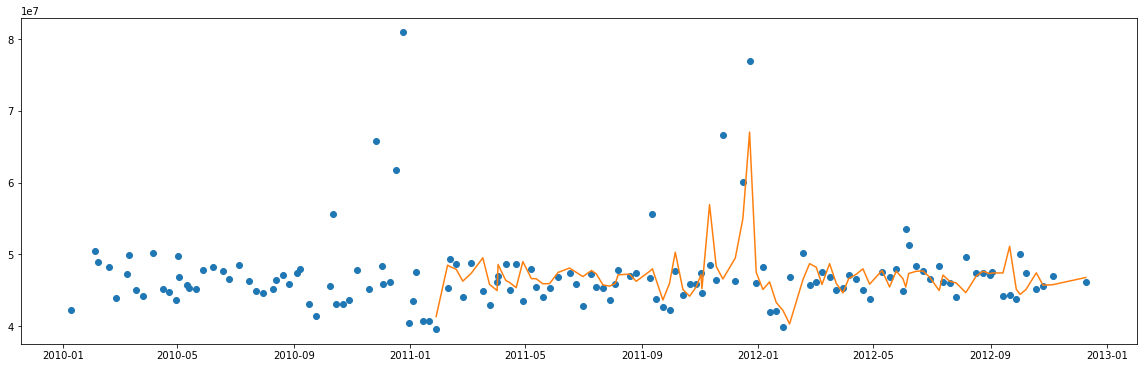

In [59]:
plt.figure(figsize=(20,6))
plt.plot(df_weekly, 'o')
plt.plot(pred_df)
plt.show()

In [60]:
residuals = (df_weekly['Weekly_Sales'] - pred_df[0]) / df_weekly['Weekly_Sales']

In [61]:
print('Model Residuals: среднее %.4f, стандартное отклонение %.4f' % (residuals.mean(), residuals.std()))

Model Residuals: среднее -0.0047, стандартное отклонение 0.0677


### Добавляем внешние переменные

In [62]:
ext_variables = new_df.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()
ext_variables = ext_variables.set_index('Date')
ext_variables.head(3)

,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,
2010-01-10,20.770555,2.733064,168.004935,8.433960
2010-02-04,11.437715,2.825453,167.377836,8.441092
2010-02-07,24.753308,2.793190,167.663264,8.373801


In [63]:
X = np.array([df_weekly.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(df_weekly))])

In [64]:
X[-5:]

array([[50009407.92, 47159639.43, 46901504.94, 44627319.4 , 42195830.81],
       [47403451.04, 47480454.11, 44993794.45, 48474224.75, 47669734.66],
       [45122410.57, 44226038.65, 45272862.02, 46438980.56, 44374820.3 ],
       [45544116.29, 44354547.11, 47124197.93, 66593605.26, 45818953.44],
       [46925878.99, 43734899.4 , 46629261.41, 46249569.21, 45855821.05]])

In [65]:
X = np.append(X, ext_variables.values, axis=1)

In [66]:
X[-5:]

array([[5.00094079e+07, 4.71596394e+07, 4.69015049e+07, 4.46273194e+07,
        4.21958308e+07, 2.73133957e+01, 3.63385796e+00, 1.75378772e+02,
        7.22467636e+00],
       [4.74034510e+07, 4.74804541e+07, 4.49937945e+07, 4.84742248e+07,
        4.76697347e+07, 1.56404200e+01, 3.87841254e+00, 1.76295499e+02,
        6.94892814e+00],
       [4.51224106e+07, 4.42260386e+07, 4.52728620e+07, 4.64389806e+07,
        4.43748203e+07, 1.58501540e+01, 3.79108550e+00, 1.76182886e+02,
        6.94321156e+00],
       [4.55441163e+07, 4.43545471e+07, 4.71241979e+07, 6.65936053e+07,
        4.58189534e+07, 1.79613765e+01, 3.87021191e+00, 1.75033194e+02,
        7.40799260e+00],
       [4.69258790e+07, 4.37348994e+07, 4.66292614e+07, 4.62495692e+07,
        4.58558210e+07, 1.42707135e+01, 3.89742508e+00, 1.76123786e+02,
        6.95268194e+00]])

In [67]:
Y = df_weekly.values

In [68]:
na_filter = ~np.isnan(X[:,:1]).squeeze()

In [69]:
model_with_external = LinearRegression()
model_with_external.fit(X[na_filter], Y[na_filter].ravel())
coef = model_with_external.coef_
intercept = model_with_external.intercept_

In [71]:
print(coef)

[ 4.33507957e-02 -1.02345222e-01  1.42654826e-02 -9.72930321e-03
  4.78751067e-01 -3.93999110e+04 -4.55169050e+06  2.23169518e+06
  9.90359716e+06]


In [72]:
print(intercept)

-418130086.70103925


In [73]:
X = np.array([df_weekly.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(df_weekly))])
    
X = np.append(X, ext_variables.values, axis=1)
    
predict_ext = np.array( np.dot(X, coef.T) + intercept)
    

In [74]:
pred_ext_df = pd.DataFrame(index=df_weekly.index, data=predict_ext)

In [75]:
pred_ext_df.tail(3)

,0
Date,
2012-10-26,4.480712e+07
2012-11-05,4.692785e+07
2012-12-10,4.520589e+07


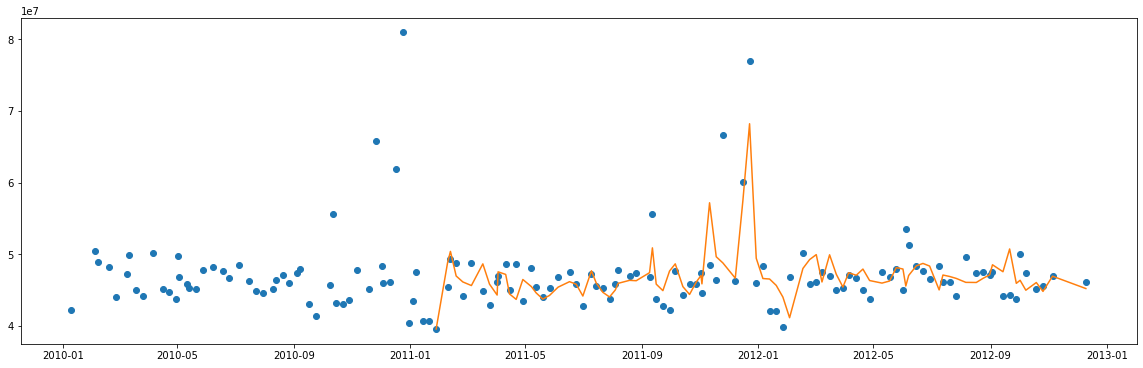

In [76]:
plt.figure(figsize=(20,6))
plt.plot(df_weekly, 'o')
plt.plot(pred_ext_df)
plt.show()

In [77]:
residuals = (df_weekly['Weekly_Sales'] - pred_ext_df[0]) / df_weekly['Weekly_Sales']

In [78]:
print('Model Residuals: среднее %.4f, стандартное отклонение %.4f' % (residuals.mean(), residuals.std()))

Model Residuals: среднее -0.0041, стандартное отклонение 0.0647


### Самостоятельный кейс №2

Добавить переменные, начинающиеся c MarkDown в модель (предварительно заполнив пропуски), и оценить изменение результатов прогнозирования

### Домашняя работа №2

In [83]:
new_df = df[["Store", "Dept", "Date", "Weekly_Sales", "IsHoliday", 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', "Type", "Size"]]

In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  object        
 5   MarkDown1     150681 non-null  float64       
 6   MarkDown2     111248 non-null  float64       
 7   MarkDown3     137091 non-null  float64       
 8   MarkDown4     134967 non-null  float64       
 9   MarkDown5     151432 non-null  float64       
 10  Type          421570 non-null  object        
 11  Size          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 41.8+ MB


In [85]:
new_df.fillna(0, inplace=True)

In [86]:
df_weekly = new_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_weekly['Date']=pd.to_datetime(df_weekly['Date'])
df_weekly.set_index('Date', inplace=True)

In [87]:
orders=np.array([1,6,29,46,52])

In [88]:
ext_variables = new_df.groupby(by=['Date'], as_index=False)[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
ext_variables = ext_variables.set_index('Date')
ext_variables.head(3)

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,
2010-01-10,0.0,0.0,0.0,0.0,0.0
2010-02-04,0.0,0.0,0.0,0.0,0.0
2010-02-07,0.0,0.0,0.0,0.0,0.0


In [89]:
X = np.array([df_weekly.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(df_weekly))])

In [90]:
X = np.append(X, ext_variables.values, axis=1)

In [91]:
Y = df_weekly.values

In [92]:
na_filter = ~np.isnan(X[:,:1]).squeeze()

In [93]:
model_with_external = LinearRegression()
model_with_external.fit(X[na_filter], Y[na_filter].ravel())
coef = model_with_external.coef_
intercept = model_with_external.intercept_

In [94]:
X = np.array([df_weekly.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(df_weekly))])
    
X = np.append(X, ext_variables.values, axis=1)
    
predict_ext = np.array( np.dot(X, coef.T) + intercept)
    

In [95]:
pred_ext_df = pd.DataFrame(index=df_weekly.index, data=predict_ext)

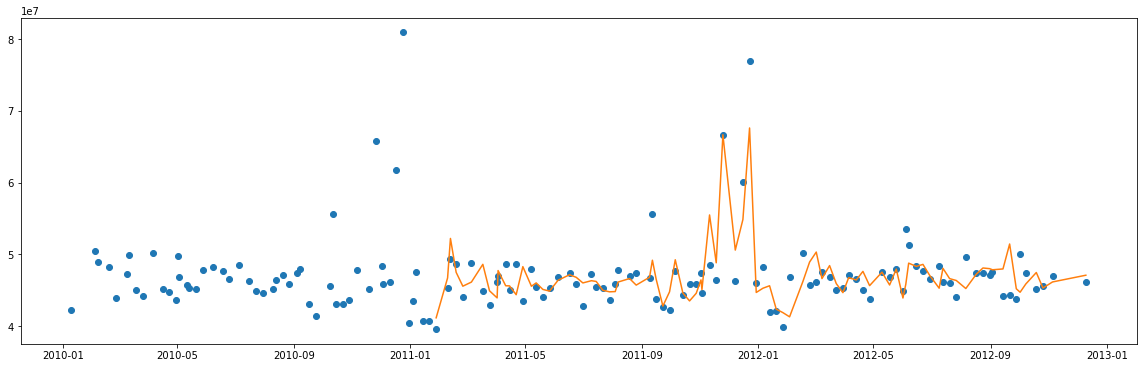

In [96]:
plt.figure(figsize=(20,6))
plt.plot(df_weekly, 'o')
plt.plot(pred_ext_df)
plt.show()

In [97]:
residuals = (df_weekly['Weekly_Sales'] - pred_ext_df[0]) / df_weekly['Weekly_Sales']

In [98]:
print('Model Residuals: среднее %.4f, стандартное отклонение %.4f' % (residuals.mean(), residuals.std()))

Model Residuals: среднее -0.0029, стандартное отклонение 0.0564
